<a href="https://colab.research.google.com/github/ravi-prakash1907/A-tracking-of-COVID-19/blob/master/emailAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dual-layer Dual-algo based Spam EMail Filtering using Fuzzy Logic**  

_(using two layers for fuzzification)_

## Requirements

### Libraries

In [28]:
# For model
from sklearn import svm
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.naive_bayes import GaussianNB
from time import time

# For Handeling Datasets
import pandas as pd

# Performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Visualization
import seaborn as sns

# Other Purpose
import requests
import warnings
warnings.filterwarnings('ignore')

### Data Downloader

In [2]:
## fun. to download the data from any url
def downloadData(fileURL, saveAs='downloaded'):
  req = requests.get(fileURL)
  fileURLContent = req.content
  data = open(saveAs, 'wb')
  
  data.write(fileURLContent)
  data.close()

## **Model Building**  

Total data points for training: **3242**  
Total data points for prediction: **1389** _(233+943+63+24+126)_  

### **Phase-1**  

Classified as:  
1. _Surely Spam: 233_  
2. _Surely Ham: 943_  

#### Data Collection

In [3]:
## location of the file
testURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/spams/Datasets/train-test-split/forPhase1/EMail/test.csv?token=AJGAAOBISPPMXOUNYTFLYGLAWRDEU'
trainURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/spams/Datasets/train-test-split/forPhase1/EMail/train.csv?token=AJGAAOF6LBU3RGWEIW5T4LDAWRDGM'

## downloading the from url
downloadData(testURL,'test.csv')
downloadData(trainURL,'train.csv')

In [164]:
#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('train.csv')
train.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,3,5,3,2,3,1,24,1,2,2,7,5,0,1,18,3,0,1,1,1,0,2,1,22,0,3,1,3,0,0,0,7,0,5,0,1,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3,1,1,3,0,14,1,0,5,3,1,1,0,13,1,0,1,0,0,0,2,0,6,2,0,0,0,0,2,0,5,0,4,0,0,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,3,10,6,5,2,67,2,2,4,9,5,1,7,34,3,0,0,2,1,1,1,3,15,2,2,0,0,3,3,1,12,0,8,4,2,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,11,13,1,15,5,6,132,15,2,26,19,7,1,0,124,2,2,0,2,2,7,11,3,88,0,17,3,8,8,1,0,11,1,12,0,3,0,0,3,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8,0,0,0,1,0,0
4,0,1,1,0,1,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(3242, 3001)

In [6]:
train.describe()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,...,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,7.316163,6.862739,5.484269,3.437076,3.374769,2.956817,61.632326,2.744911,2.181678,11.895743,12.264651,5.956200,1.539790,1.455583,51.166564,3.577730,1.013263,0.960518,0.866749,1.042566,0.923504,7.702961,2.165638,46.374460,1.523442,5.030228,0.733498,2.071252,5.314004,0.887415,0.662862,8.623689,0.929673,5.903146,0.737199,1.324183,0.592844,0.501234,0.686613,10.052128,...,0.006477,0.006477,0.005244,0.005861,0.004318,0.010487,0.005861,0.005244,0.009254,0.004318,0.005244,0.006786,0.075879,0.005552,0.011104,0.007094,0.006477,0.021900,0.007711,0.020358,0.008328,0.006477,0.007403,0.005861,0.009562,0.040716,0.009254,0.004627,0.006169,0.005244,0.004935,0.011413,0.011721,0.119988,0.005244,0.008020,0.003701,1.024676,0.008328,0.319864
std,12.203673,10.142276,15.325389,6.365444,4.930046,6.700264,95.496329,4.560676,7.539713,20.736938,19.946325,9.558921,3.017146,5.242355,83.589615,5.434043,2.141293,2.273287,1.473245,2.178131,2.114658,13.865900,3.874140,71.223216,2.698504,8.923602,1.323807,13.584327,8.246891,1.739952,2.009888,13.576061,1.908260,8.769910,1.861951,2.403862,2.098511,1.439352,1.194660,15.388943,...,0.106650,0.083992,0.084078,0.084037,0.065582,0.255542,0.076342,0.100770,0.110708,0.099272,0.076386,0.092700,0.386175,0.078359,0.148634,0.094327,0.097586,0.224567,0.103632,0.159698,0.165503,0.087588,0.099089,0.080282,0.200819,0.252495,0.104986,0.072276,0.092743,0.181623,0.099243,0.159622,0.118557,0.660127,0.106718,0.156906,0.060736,3.163645,0.112165,0.466496
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [8]:
test=pd.read_csv('test.csv')
test.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,3,1,2,2,0,0,16,1,0,3,2,6,2,0,16,0,1,0,0,0,0,3,0,13,0,0,0,0,2,2,0,0,0,1,1,0,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,1,0,1,1,8,0,1,2,5,1,0,0,5,2,0,0,0,0,0,2,0,5,0,0,0,1,1,0,0,2,0,2,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,2,0,0,0,7,0,0,1,1,1,0,0,6,1,0,0,0,0,0,1,0,7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,3,0,0,0,3,0,0,3,2,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,3,2,4,1,2,30,1,0,2,10,5,1,1,22,0,2,2,0,0,0,7,2,30,1,0,1,0,2,0,0,2,1,4,0,2,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [272]:
test.shape

(1389, 3001)

#### **Layer-1** 

**Test:Train Ratio** (in %)**:** 30:70  
**Algorithm Used:** Gaussian Naive Bayse  
**Accuracy:** 0.86

##### Dependent-Independent Var. Split

In [7]:
train_y=train['Prediction'] ## predictions
train_x=train.drop(['Prediction'],axis=1) ## dependent var

In [9]:
test_y=test['Prediction'] ## predictions
test_x=test.drop(['Prediction'],axis=1) ## dependent var

##### **Building SVM Model**

In [10]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [11]:
# Train the model using the training sets and check score on test dataset
support.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [14]:
## predicting
predicted= support.predict(test_x)

###### Performance Measures

In [15]:
f1Score=f1_score(test_y,predicted)

accuracy=accuracy_score(test_y,predicted)
precision=precision_score(test_y,predicted)
recall=recall_score(test_y,predicted)

In [16]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

Model's Performance Measures:

F1-Score: 0.9353701527614571 
Accuracy: 0.9604031677465803 
Precision: 0.9320843091334895 
Recall: 0.9386792452830188


Confusion matrix: 
 [[936  29]
 [ 26 398]] 



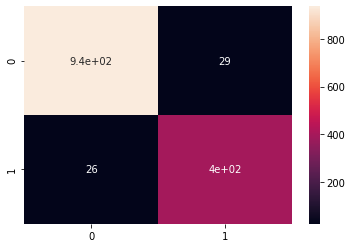

In [17]:
## confussion matrix
cf_matrix = confusion_matrix(test_y,predicted)
print("Confusion matrix: \n", cf_matrix, "\n")

sns.heatmap(cf_matrix, annot=True)

##### **Building NB Model**  
[idea here](https://towardsdatascience.com/training-a-naive-bayes-model-to-identify-the-author-of-an-email-or-document-17dc85fa630a)

In [20]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(train_x, train_y)

SelectPercentile(percentile=10,
                 score_func=<function f_classif at 0x7f4cd9b465f0>)

In [25]:
features_train = selector.transform(train_x)#.toarray()   # already an array
features_test = selector.transform(test_x)#.toarray()     # already an array

labels_train = train_y
labels_test = test_y

In [58]:
t0 = time()
modelNB = GaussianNB()
modelNB.fit(features_train, labels_train)

print(f"\nTraining time: {round(time()-t0, 3)}s")


Training time: 0.026s


In [59]:
# predictions
predictedNB=modelNB.predict(features_test)

###### Performance Measures

In [60]:
t0 = time()
score_train = modelNB.score(features_train, labels_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test = modelNB.score(features_test, labels_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train)
print("Test set score:", score_test)

Prediction time (train): 0.019s
Prediction time (test): 0.007s

Train set score: 0.8676742751388032
Test set score: 0.86321094312455


##### Data Exporting for Layer-2

*Model with lower accuracy will be used here i.e. NB*

In [63]:
## Layer-1 Prediction using NB Model (acc 0.86)
predictedNB = modelNB.predict(features_test)

In [64]:
## separate predicted spam & ham values as above (2 groups)
combinedTest = test.copy()
combinedTest['NBPrediction'] = predictedNB
combinedTest.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction
0,3,1,2,2,0,0,16,1,0,3,2,6,2,0,16,0,1,0,0,0,0,3,0,13,0,0,0,0,2,2,0,0,0,1,1,0,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,1,0,1,1,8,0,1,2,5,1,0,0,5,2,0,0,0,0,0,2,0,5,0,0,0,1,1,0,0,2,0,2,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,2,0,0,0,7,0,0,1,1,1,0,0,6,1,0,0,0,0,0,1,0,7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,1,0,3,0,0,0,3,0,0,3,2,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,3,2,4,1,2,30,1,0,2,10,5,1,1,22,0,2,2,0,0,0,7,2,30,1,0,1,0,2,0,0,2,1,4,0,2,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
## make correct and false predictions (by layer 1) easily identifiable
layer1Ham = combinedTest[combinedTest['NBPrediction'] == 0]
layer1Spam = combinedTest[combinedTest['NBPrediction'] == 1]

In [66]:
layer1Ham.to_csv("hams.csv")
layer1Spam.to_csv("spams.csv")

#### **Layer-2** 

**Test:Train Ratio** (in %)**:** _pre-trained model is used only for prediction_  
**Algorithm Used:** Linear Support Vector Machine  
**Accuracy:** 0.96

In [68]:
## supply both groups (layer1Ham, layer1Spam) i.e. predicted by
## NB classifier separatly to SVM Classification (trained above)

##### **Using Hams i.e. Predicted by NB**

In [85]:
## Dependent-Independent Var. Split
layer1Ham_y=layer1Ham['Prediction'] ## predictions
layer1Ham_x=layer1Ham.drop(['Prediction','NBPrediction'],axis=1) ## dependent var

In [86]:
## Layer-1 Prediction using NB Model
svmPredictedHam = support.predict(layer1Ham_x)

In [87]:
f1Score=f1_score(layer1Ham_y,svmPredictedHam)

accuracy=accuracy_score(layer1Ham_y,svmPredictedHam)
precision=precision_score(layer1Ham_y,svmPredictedHam)
recall=recall_score(layer1Ham_y,svmPredictedHam)

Performance Check

In [88]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

Model's Performance Measures:

F1-Score: 0.8906666666666666 
Accuracy: 0.9639401934916447 
Precision: 0.8608247422680413 
Recall: 0.9226519337016574


In [89]:
# IN PHASE 1, PERFORMANCE OF THIS SVM Classifier
# F1-Score: 0.9353701527614571 
# Accuracy: 0.9604031677465803 
# Precision: 0.9320843091334895 
# Recall: 0.9386792452830188

True / False Separation

In [90]:
## separate predicted spam & ham values as above (2 groups)
combinedTest = layer1Ham.copy()
combinedTest['SVMPrediction'] = svmPredictedHam
combinedTest.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
0,3,1,2,2,0,0,16,1,0,3,2,6,2,0,16,0,1,0,0,0,0,3,0,13,0,0,0,0,2,2,0,0,0,1,1,0,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,1,0,1,1,8,0,1,2,5,1,0,0,5,2,0,0,0,0,0,2,0,5,0,0,0,1,1,0,0,2,0,2,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,2,0,0,0,7,0,0,1,1,1,0,0,6,1,0,0,0,0,0,1,0,7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,1,0,3,0,0,0,3,0,0,3,2,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,3,2,4,1,2,30,1,0,2,10,5,1,1,22,0,2,2,0,0,0,7,2,30,1,0,1,0,2,0,0,2,1,4,0,2,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
## make correct and false predictions (by layer 1) easily identifiable
layer2TrueHam = combinedTest[combinedTest['SVMPrediction'] == 0]
layer2FalseHam = combinedTest[combinedTest['SVMPrediction'] == 1]

In [106]:
print("Total: ", layer1Ham.shape[0])
print("Strongly Ham: ", layer2TrueHam.shape[0])

print("Need further analysis: ", layer1Ham.shape[0] - layer2TrueHam.shape[0])

Total:  1137
Strongly Ham:  943
Need further analysis:  194


##### **Using Spams i.e. Predicted by NB**

In [92]:
## Dependent-Independent Var. Split
layer1Spam_y=layer1Spam['Prediction'] ## predictions
layer1Spam_x=layer1Spam.drop(['Prediction','NBPrediction'],axis=1) ## dependent var

In [93]:
## Layer-1 Prediction using NB Model
svmPredictedSpam = support.predict(layer1Spam_x)

In [94]:
f1Score=f1_score(layer1Spam_y,svmPredictedSpam)

accuracy=accuracy_score(layer1Spam_y,svmPredictedSpam)
precision=precision_score(layer1Spam_y,svmPredictedSpam)
recall=recall_score(layer1Spam_y,svmPredictedSpam)

In [95]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

Model's Performance Measures:

F1-Score: 0.9705882352941176 
Accuracy: 0.9444444444444444 
Precision: 0.9914163090128756 
Recall: 0.9506172839506173


In [96]:
# IN PHASE 1, PERFORMANCE OF THIS SVM Classifier
# F1-Score: 0.9353701527614571 
# Accuracy: 0.9604031677465803 
# Precision: 0.9320843091334895 
# Recall: 0.9386792452830188

True / False Separation

In [98]:
## separate predicted spam & ham values as above (2 groups)
combinedTest = layer1Spam.copy()
combinedTest['SVMPrediction'] = svmPredictedSpam
combinedTest.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
5,6,24,7,5,3,5,455,2,2,60,59,42,1,0,366,24,0,1,0,2,1,55,9,261,5,27,2,7,29,0,1,46,0,29,0,9,0,0,0,44,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,1,1
6,13,3,2,6,1,2,55,2,2,23,4,5,0,0,53,2,0,1,0,0,1,5,2,63,1,4,0,2,12,0,0,5,1,1,0,1,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
11,2,5,2,0,1,2,27,0,0,6,0,1,0,0,17,0,0,0,0,0,0,0,1,20,0,0,0,0,7,1,0,3,0,2,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0
12,5,4,2,6,1,1,65,12,0,8,7,7,2,0,57,3,1,0,0,0,5,7,0,66,0,2,1,0,2,3,0,6,1,6,0,2,0,0,0,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
28,1,5,1,0,2,1,49,3,2,11,3,3,1,0,36,1,3,1,0,1,1,11,2,29,1,7,1,3,2,1,0,7,1,8,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1


In [99]:
## make correct and false predictions (by layer 1) easily identifiable
layer2FalseSpam = combinedTest[combinedTest['SVMPrediction'] == 0]
layer2TrueSpam = combinedTest[combinedTest['SVMPrediction'] == 1]

In [105]:
print("Total: ", layer1Spam.shape[0])
print("Strongly Spam: ", layer2TrueSpam.shape[0])

print("Need further analysis: ", layer1Spam.shape[0] - layer2TrueSpam.shape[0])

Total:  252
Strongly Spam:  233
Need further analysis:  19


**Grouping Layer-2 Predictions**

In [121]:
## strongly correct predictions
phase1FinalPrediction = layer2TrueHam.copy()
phase1FinalPrediction = phase1FinalPrediction.append(layer2TrueSpam)

# this will be appended with the training data in phase 2
phase1FinalPrediction.head() # strongly spam / ham 

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
0,3,1,2,2,0,0,16,1,0,3,2,6,2,0,16,0,1,0,0,0,0,3,0,13,0,0,0,0,2,2,0,0,0,1,1,0,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,1,0,1,1,8,0,1,2,5,1,0,0,5,2,0,0,0,0,0,2,0,5,0,0,0,1,1,0,0,2,0,2,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,3,0,0,0,3,0,0,3,2,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,3,2,4,1,2,30,1,0,2,10,5,1,1,22,0,2,2,0,0,0,7,2,30,1,0,1,0,2,0,0,2,1,4,0,2,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4,3,14,3,0,0,43,1,7,8,3,6,1,0,30,3,0,0,0,0,0,5,1,33,0,3,0,0,4,0,1,2,0,3,2,0,1,0,1,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [122]:
## test data for phase 2
testPhase2 = layer2FalseHam.copy()
testPhase2 = testPhase2.append(layer2FalseSpam)
testPhase2.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
2,0,2,2,0,0,0,7,0,0,1,1,1,0,0,6,1,0,0,0,0,0,1,0,7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
14,2,1,1,2,0,0,17,0,0,0,2,2,0,0,13,0,0,0,0,1,0,1,1,10,0,2,0,1,1,0,0,0,1,1,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
15,0,4,1,2,1,0,21,4,0,2,1,0,0,0,21,0,0,0,0,0,2,2,0,10,0,4,0,2,1,0,0,1,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
16,0,0,1,0,0,0,2,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
18,0,1,1,1,1,1,8,0,0,3,0,3,1,0,10,1,0,0,0,0,0,0,1,7,1,1,0,0,0,0,0,2,0,2,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


*exporting*

In [123]:
phase1FinalPrediction.to_csv("emailPhase1Results.csv", index=False)
testPhase2.to_csv("emailTestPhase2.csv", index=False)

---  

### **Phase-2**  
  
Classified as:  
1. _Most Likely Spam: 63_  
2. _Most Likely Ham: 24_  
3. _Can't say: 110+16 = 126_

#### Data Preparation

In [391]:
## join correct phase 1 predictions to trainintg data

In [392]:
# old training data
display(train.head())
print("Shape: ", train.shape)

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,3,5,3,2,3,1,24,1,2,2,7,5,0,1,18,3,0,1,1,1,0,2,1,22,0,3,1,3,0,0,0,7,0,5,0,1,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3,1,1,3,0,14,1,0,5,3,1,1,0,13,1,0,1,0,0,0,2,0,6,2,0,0,0,0,2,0,5,0,4,0,0,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,3,10,6,5,2,67,2,2,4,9,5,1,7,34,3,0,0,2,1,1,1,3,15,2,2,0,0,3,3,1,12,0,8,4,2,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,11,13,1,15,5,6,132,15,2,26,19,7,1,0,124,2,2,0,2,2,7,11,3,88,0,17,3,8,8,1,0,11,1,12,0,3,0,0,3,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8,0,0,0,1,0,0
4,0,1,1,0,1,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Shape:  (3242, 3001)


In [389]:
# latest predictions
display(phase1FinalPrediction.head())
print("Shape: ", phase1FinalPrediction.shape)

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,SVMPrediction,NBPrediction
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,0,1,1,0,1,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
120,124,52,32,34,37,55,559,0,5,140,142,67,10,1,602,15,16,9,2,6,0,124,26,606,2,69,14,24,67,4,1,76,7,57,0,23,0,0,0,120,...,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0
144,1,0,1,1,0,0,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198,0,1,1,0,0,0,18,1,0,7,6,2,0,0,24,2,0,0,0,0,0,3,1,13,0,0,0,0,0,1,0,2,1,2,0,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Shape:  (21, 3003)


In [386]:
## predicted data has 2 additional columns
## we'll skip them in new train data
newTrain = train.copy()
newTrain = newTrain.append(phase1FinalPrediction.drop(['NBPrediction','SVMPrediction'],axis=1))

In [382]:
# shuffle the training datasets rows newly appended
# were all accurate predictions rows
newTrain = newTrain.sample(frac = 1)
newTrain.reset_index(inplace=True)
newTrain.drop(['level_0'],axis=1, inplace=True)

--- 

In [395]:
## showing new (joined) training data
display(newTrain.head(3))
print("\nShape: ", newTrain.shape)

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,3,2,1,4,2,0,39,7,0,7,6,1,0,0,28,4,0,1,2,0,1,1,2,20,1,5,0,1,3,0,0,4,0,3,0,3,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,3,1,0,0,0,10,3,0,3,2,0,0,0,10,1,0,0,0,0,1,5,0,8,0,0,0,0,1,0,0,1,0,2,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,2,1,1,1,0,13,2,0,0,2,3,0,0,19,0,0,0,0,0,1,0,1,11,1,2,0,0,1,0,0,6,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1



Shape:  (4418, 3001)


In [396]:
## test data
newTest = testPhase2.copy()
newTest.drop(['NBPrediction','SVMPrediction'],axis=1,inplace=True)

In [397]:
# shuffle the training datasets rows newly appended
# were all accurate predictions rows
newTest = newTest.sample(frac = 1)
newTest.reset_index(inplace=True)
newTest.drop(['level_0'],axis=1, inplace=True)

In [398]:
## showing new test data
display(newTest.head(3))
print("\nShape: ", newTest.shape)

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,2,1,1,1,0,20,5,0,4,2,2,0,0,12,0,0,0,0,0,2,3,0,10,1,0,0,1,0,0,0,3,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,4,1,0,26,2,0,5,0,3,0,0,25,0,0,0,0,0,0,2,2,28,1,4,0,0,0,1,0,4,0,0,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,8,0,0,2,1,0,0,0,6,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1



Shape:  (213, 3001)


---

##### <font color="blue">**A Little Bit of Maths!**</font>

Rows in training data = 4418  
Rows in testing data = 213  

Train-Test Ratio = <font color="red">~ **95 : 5**</font>  

\

_For a better split, we will **choose** some of the rows from **`newTrain`**  
data to get a Test-Train ratio of <font color="green">**80 : 20**</font>_  

---  

So, test if data be (213 rows) 20% of the whole, we need to find  
how many rows will lie in other 80% of data i.e. used for training??  



In [399]:
testRows = 213
totalRows = (213 * 100)//20

trainRows = (80 * totalRows)//100

print("Total rows: ", totalRows)
print("Required number of rows in training dataset: ", trainRows)

Total rows:  1065
Required number of rows in training dataset:  852


<font color="blue">**Even more curiosity ?**</font>

1. Why did we add a part of Phase-1 test data in new training dataset?  
> _to introduce new data so that model can better tune the parameters_  
> _because model was successful to find trends in that data (guess how ;))_  

2. Why did we select only few deatapoints in **`newTrain`**?  
> _because we should have a godd and balanced train-test combination_  
> _in other case, the model was most likely to be biased of OVERTRAINED_  

3. Why did we take the split ration as 80:20 i.e. instead of 70:30 (as in Phase-1)?  
> _Because this time while choosing 70-30 (%) of ratio would have resulted into **497** training and **213** testig data rows._  
> _For such a small testing dataset, most likely, we would have ended up with an undertrained model_  
> _**80 : 20** seems to be a good size for our current situation now we are applying same procedure an a smaller dataset that needs a better performance_  

--- 

Hence, we'll now randomly pick and keep just **850 to 855** rows in **`newTrain`**!  

_i.e. We'll reduce the size of `newTrain` to \[**(852 x 100) / 4418**\]% of current size (in fractions = ~ 0.193)_  

We are naming new dataset be **`finalTrain`**

##### Finishing data prep.

In [ ]:
newTrainBackup = newTrain.copy() ## taking backup of newTrain

In [402]:
## sampling required number of rows
newTrain = newTrain.sample(frac=0.193)
newTrain.reset_index(inplace=True)
newTrain.drop(['level_0'],axis=1, inplace=True)

display(newTrain.head(3))
print("New Shape: ", newTrain.shape)

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,44,33,62,30,39,4,324,18,27,36,53,32,12,4,184,17,1,5,6,5,4,32,6,214,11,15,3,0,35,2,7,58,0,72,18,5,26,3,8,50,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,5,1,1,2,2,23,0,3,4,12,1,0,0,22,0,0,0,1,0,0,4,0,19,0,0,0,2,2,0,1,4,0,2,0,0,0,1,1,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,5,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


New Shape:  (853, 3001)


#### **Layer-1** 

**Test:Train Ratio** (in %)**:** 20:80  
**Algorithm Used:** Gaussian Naive Bayse  
**Accuracy:** 0.87

##### Dependent-Independent Var. Split

In [456]:
train_y=newTrain['Prediction'] ## predictions
train_x=newTrain.drop(['Prediction'],axis=1) ## dependent var

In [457]:
test_y=newTest['Prediction'] ## predictions
test_x=newTest.drop(['Prediction'],axis=1) ## dependent var

##### **Building SVM Model**

In [413]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)
# Train the model using the training sets and check score on test dataset
support.fit(train_x, train_y)

## predicting
predicted= support.predict(test_x)

###### Performance Measures

In [414]:
f1Score=f1_score(test_y,predicted)

accuracy=accuracy_score(test_y,predicted)
precision=precision_score(test_y,predicted)
recall=recall_score(test_y,predicted)

In [415]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

Model's Performance Measures:

F1-Score: 0.9034090909090909 
Accuracy: 0.8403755868544601 
Precision: 0.9190751445086706 
Recall: 0.888268156424581


In [416]:
## in Phase 1

# F1-Score: 0.9353701527614571 
# Accuracy: 0.9604031677465803 
# Precision: 0.9320843091334895 
# Recall: 0.9386792452830188

Confusion matrix: 
 [[ 20  14]
 [ 20 159]] 



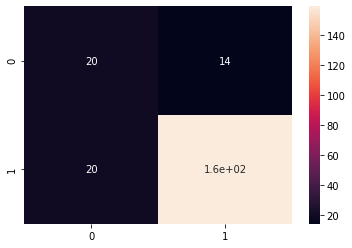

In [417]:
## confussion matrix
cf_matrix = confusion_matrix(test_y,predicted)
print("Confusion matrix: \n", cf_matrix, "\n")

sns.heatmap(cf_matrix, annot=True)

##### **Building NB Model**  

In [458]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(train_x, train_y)

SelectPercentile(percentile=10,
                 score_func=<function f_classif at 0x7f4cd9b465f0>)

In [459]:
features_train = selector.transform(train_x)
features_test = selector.transform(test_x)

labels_train = train_y
labels_test = test_y

In [460]:
t0 = time()
modelNB = GaussianNB()
modelNB.fit(features_train, labels_train)

print(f"\nTraining time: {round(time()-t0, 3)}s")


Training time: 0.016s


###### Performance Measures

In [461]:
t0 = time()
score_train = modelNB.score(features_train, labels_train)
print(f"Prediction time (train): {round(time()-t0, 3)}s")

t0 = time()
score_test = modelNB.score(features_test, labels_test)
print(f"Prediction time (test): {round(time()-t0, 3)}s")

print("\nTrain set score:", score_train)
print("Test set score:", score_test)

Prediction time (train): 0.008s
Prediction time (test): 0.003s

Train set score: 0.9191090269636577
Test set score: 0.43661971830985913


In [462]:
predictedNB=modelNB.predict(features_test)

f1Score=f1_score(test_y,predictedNB)

accuracy=accuracy_score(test_y,predictedNB)
precision=precision_score(test_y,predictedNB)
recall=recall_score(test_y,predictedNB)

In [463]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

Model's Performance Measures:

F1-Score: 0.5348837209302325 
Accuracy: 0.43661971830985913 
Precision: 0.8734177215189873 
Recall: 0.3854748603351955


##### Data Exporting for Layer-2

*Model with lower accuracy will be used here i.e. NB*

In [423]:
## Layer-1 Prediction using NB Model
predictedNB=modelNB.predict(features_test)

In [424]:
## separate predicted spam & ham values as above (2 groups)
combinedTest = newTest.copy()
combinedTest['NBPrediction'] = predictedNB
combinedTest.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction
0,1,2,1,1,1,0,20,5,0,4,2,2,0,0,12,0,0,0,0,0,2,3,0,10,1,0,0,1,0,0,0,3,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,4,1,0,26,2,0,5,0,3,0,0,25,0,0,0,0,0,0,2,2,28,1,4,0,0,0,1,0,4,0,0,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,8,0,0,2,1,0,0,0,6,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,1,1,0,2,0,25,4,0,3,5,0,0,0,15,2,0,0,1,0,1,9,2,11,1,2,0,0,2,0,0,4,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,7,1,3,3,0,76,4,1,9,14,4,1,0,48,5,0,0,0,1,0,8,2,49,0,8,1,1,7,0,1,10,0,1,0,2,0,0,1,14,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [425]:
## make correct and false predictions (by layer 1) easily identifiable
layer1Ham = combinedTest[combinedTest['NBPrediction'] == 0]
layer1Spam = combinedTest[combinedTest['NBPrediction'] == 1]

In [426]:
layer1Ham.to_csv("hams.csv")
layer1Spam.to_csv("spams.csv")

#### **Layer-2** 

**Test:Train Ratio** (in %)**:** _pre-trained model is used only for prediction_  
**Algorithm Used:** Linear Support Vector Machine  
**Accuracy:** 0.92

In [427]:
## supply both groups (layer1Ham, layer1Spam) i.e. predicted by
## SVM classifier separatly to NB Classification (trained above)

##### **Using Hams i.e. Predicted by NB**

In [428]:
## Dependent-Independent Var. Split
layer1Ham_y=layer1Ham['Prediction'] ## predictions
layer1Ham_x=layer1Ham.drop(['Prediction','NBPrediction'],axis=1) ## dependent var

In [429]:
## Layer-2 Prediction using SVM Model
svmPredictedHam= support.predict(layer1Ham_x)

In [430]:
f1Score=f1_score(layer1Ham_y,svmPredictedHam)

accuracy=accuracy_score(layer1Ham_y,svmPredictedHam)
precision=precision_score(layer1Ham_y,svmPredictedHam)
recall=recall_score(layer1Ham_y,svmPredictedHam)

Performance Check

In [431]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

Model's Performance Measures:

F1-Score: 0.8909090909090909 
Accuracy: 0.8208955223880597 
Precision: 0.8909090909090909 
Recall: 0.8909090909090909


True / False Separation

In [434]:
## separate predicted spam & ham values as above (2 groups)
combinedTest = layer1Ham.copy()
combinedTest['SVMPrediction'] = svmPredictedHam
combinedTest.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
0,1,2,1,1,1,0,20,5,0,4,2,2,0,0,12,0,0,0,0,0,2,3,0,10,1,0,0,1,0,0,0,3,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,2,4,1,0,26,2,0,5,0,3,0,0,25,0,0,0,0,0,0,2,2,28,1,4,0,0,0,1,0,4,0,0,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,1,1,1,0,2,0,25,4,0,3,5,0,0,0,15,2,0,0,1,0,1,9,2,11,1,2,0,0,2,0,0,4,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,2,7,1,3,3,0,76,4,1,9,14,4,1,0,48,5,0,0,0,1,0,8,2,49,0,8,1,1,7,0,1,10,0,1,0,2,0,0,1,14,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
6,2,12,4,0,5,1,61,13,0,9,14,7,5,0,50,3,0,3,0,0,5,13,0,40,3,0,0,0,5,0,0,12,4,2,0,1,0,0,5,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [435]:
## make correct and false predictions (by layer 1) easily identifiable
layer2TrueHam = combinedTest[combinedTest['SVMPrediction'] == 0]
layer2FalseHam = combinedTest[combinedTest['SVMPrediction'] == 1]

In [449]:
print("Total: ", layer1Ham.shape[0])
print("Most Likely Ham: ", layer2TrueHam.shape[0])

print("Can't say: ", layer1Ham.shape[0] - layer2TrueHam.shape[0])

Total:  134
Most Likely Ham:  24
Can't say:  110


##### **Using Spams i.e. Predicted by NB**

In [440]:
## Dependent-Independent Var. Split
layer1Spam_y=layer1Spam['Prediction'] ## predictions
layer1Spam_x=layer1Spam.drop(['Prediction','NBPrediction'],axis=1) ## dependent var

In [442]:
## Layer-2 Prediction using SVM Model
svmPredictedSpam= support.predict(layer1Spam_x)

In [443]:
f1Score=f1_score(layer1Spam_y,svmPredictedSpam)

accuracy=accuracy_score(layer1Spam_y,svmPredictedSpam)
precision=precision_score(layer1Spam_y,svmPredictedSpam)
recall=recall_score(layer1Spam_y,svmPredictedSpam)

Performance Check

In [444]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

Model's Performance Measures:

F1-Score: 0.9242424242424243 
Accuracy: 0.8734177215189873 
Precision: 0.9682539682539683 
Recall: 0.8840579710144928


True / False Separation

In [445]:
## separate predicted spam & ham values as above (2 groups)
combinedTest = layer1Spam.copy()
combinedTest['SVMPrediction'] = svmPredictedSpam
combinedTest.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
2,0,0,1,0,0,0,8,0,0,2,1,0,0,0,6,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,3,8,2,9,3,3,81,15,0,12,10,9,3,0,70,8,4,0,5,2,8,14,3,56,1,14,0,1,7,0,0,9,3,6,0,2,0,0,3,14,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
9,0,2,3,5,1,3,36,0,1,3,7,5,0,0,29,2,0,0,0,0,0,1,0,27,0,0,1,0,2,0,0,3,0,0,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
11,2,5,1,2,0,1,33,0,0,7,8,0,0,0,34,0,0,0,1,0,0,2,1,19,0,3,0,1,1,0,0,3,0,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
13,26,29,7,18,13,21,237,18,1,71,25,16,8,1,205,7,2,4,1,2,12,44,6,163,9,19,2,7,13,3,0,22,0,3,0,3,0,0,1,38,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [446]:
## make correct and false predictions (by layer 1) easily identifiable
layer2FalseSpam = combinedTest[combinedTest['SVMPrediction'] == 0]
layer2TrueSpam = combinedTest[combinedTest['SVMPrediction'] == 1]

In [448]:
print("Total: ", layer1Spam.shape[0])
print("Most Likely Spam: ", layer2TrueSpam.shape[0])

print("Can't say: ", layer1Spam.shape[0] - layer2TrueSpam.shape[0])

Total:  79
Most Likely Spam:  63
Can't say:  16


##### **Grouping Layer-2 Predictions**

In [450]:
## strongly correct predictions
phase2FinalPrediction = layer2TrueHam.copy()
phase2FinalPrediction = phase2FinalPrediction.append(layer2TrueSpam)

# this will be appended with the training data in phase 2
phase2FinalPrediction.head() # most likely spam / ham 

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
6,2,12,4,0,5,1,61,13,0,9,14,7,5,0,50,3,0,3,0,0,5,13,0,40,3,0,0,0,5,0,0,12,4,2,0,1,0,0,5,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,2,1,1,2,1,0,39,1,1,3,5,5,0,0,22,3,0,0,0,1,0,9,1,19,1,2,0,1,0,0,0,1,3,0,0,2,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14,0,6,1,1,0,0,12,1,0,7,2,0,0,0,11,1,0,0,0,0,1,1,1,5,2,0,0,0,2,1,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15,3,5,1,3,0,2,24,2,2,4,3,0,0,0,14,1,1,0,1,0,1,2,1,19,2,0,0,0,4,0,0,1,0,0,0,1,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32,0,2,1,0,0,0,3,0,0,0,3,0,0,0,1,1,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [451]:
## test data for phase 2
mixedPhase2 = layer2FalseHam.copy()
mixedPhase2 = mixedPhase2.append(layer2FalseSpam)
mixedPhase2.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,NBPrediction,SVMPrediction
0,1,2,1,1,1,0,20,5,0,4,2,2,0,0,12,0,0,0,0,0,2,3,0,10,1,0,0,1,0,0,0,3,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,2,4,1,0,26,2,0,5,0,3,0,0,25,0,0,0,0,0,0,2,2,28,1,4,0,0,0,1,0,4,0,0,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,1,1,1,0,2,0,25,4,0,3,5,0,0,0,15,2,0,0,1,0,1,9,2,11,1,2,0,0,2,0,0,4,0,0,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,2,7,1,3,3,0,76,4,1,9,14,4,1,0,48,5,0,0,0,1,0,8,2,49,0,8,1,1,7,0,1,10,0,1,0,2,0,0,1,14,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
7,1,1,1,0,0,2,15,1,1,2,1,1,1,0,12,0,0,0,0,0,1,3,1,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1


In [452]:
print("Shape of most likely pridictions: ", mixedPhase2.shape)
print("Shape of confusing datapoints: ", phase2FinalPrediction.shape)

Shape of most likely pridictions:  (126, 3003)
Shape of confusing datapoints:  (87, 3003)


*Exporting*

In [453]:
phase2FinalPrediction.to_csv("emailPhase2Results.csv", index=False)
mixedPhase2.to_csv("emailmixedPhase2.csv", index=False)

---  